<a href="https://colab.research.google.com/github/jihansand/Final-Project-Data-Mining-BI-Data-Kesehatan/blob/main/UTS_DataMining_Jihan_Sandrina_Halim_2106708160.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Jihan Sandrina (2106708160)**
**Data Mining & Business Intelligence**

# Pre-Processing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msnum
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler

# untuk iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
!gdown 1maDbC8WEX1TGxe6uE1X1QtR1qh0joJmq

Downloading...
From: https://drive.google.com/uc?id=1maDbC8WEX1TGxe6uE1X1QtR1qh0joJmq
To: /content/CaseStudy-AlumniData - CaseStudy-AlumniData.csv
100% 13.9k/13.9k [00:00<00:00, 23.1MB/s]


**Import Data**

In [ ]:
df = pd.read_csv('/content/CaseStudy-AlumniData - CaseStudy-AlumniData.csv')
df.head()

,Alumni-ID,Timestamp,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Tahun saudara mulai berwirausaha:,Bidang wirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
0,1,7/25/2023 9:55,2004.0,2010.0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,NaN,NaN,3.0,3.0,4.0
1,2,7/26/2023 10:10,2015.0,2020.0,ASN/PNS,6-12 bulan,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,6.0
2,3,7/28/2023 2:00,2000.0,2006.0,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,NaN,NaN,5.0,5.0,5.0
3,4,7/27/2023 14:27,2014.0,2019.0,karyawan BUMN,6-12 bulan,NaN,Officer HC Solution Analysis Support,NaN,NaN,NaN,NaN,3.0,3.0,8.0
4,5,7/25/2023 9:44,2013.0,2018.0,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,NaN,NaN,4.0,3.0,15.0


In [ ]:
df.columns

Index(['Alumni-ID', 'Timestamp', 'Tahun Masuk', 'Tahun Wisuda',
       'Status saat ini:', 'Waktu Mendapatkan Pekerjaan:',
       'Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:',
       'Posisi anda saat ini di tempat bekerja saat Ini:',
       'Nama Universitas dan Kota tempat melanjutkan Studi setelah S1',
       'Nama jurusan/program studi setelah S1',
       'Tahun saudara mulai berwirausaha:', 'Bidang wirausaha:',
       'Kesesuaian Kurikulum:', 'Kesesuaian Bidang Ilmu:',
       'Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):'],
      dtype='object')

In [ ]:
df = df.rename(columns = {'Alumni-ID':'ID', 'Tahun Masuk':'Tahun_Masuk', 'Tahun Wisuda':'Tahun_Wisuda',
                          'Status saat ini:':'Status', 'Waktu Mendapatkan Pekerjaan:':'WMP',
                          'Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:':'Th_lanjut_studi',
                          'Posisi anda saat ini di tempat bekerja saat Ini:':'Posisi',
                          'Nama Universitas dan Kota tempat melanjutkan Studi setelah S1':'Univ_lanjutan',
                          'Nama jurusan/program studi setelah S1':'Prodi_lanjutan',
                          'Tahun saudara mulai berwirausaha:':'Th_wirausaha',
                          'Bidang wirausaha:':'Bidang_Wirausaha',
                          'Kesesuaian Kurikulum:':'KK', 'Kesesuaian Bidang Ilmu:':'KBI',
                          'Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):':'Penghasilan'})
df.columns

Index(['ID', 'Timestamp', 'Tahun_Masuk', 'Tahun_Wisuda', 'Status', 'WMP',
       'Th_lanjut_studi', 'Posisi', 'Univ_lanjutan', 'Prodi_lanjutan',
       'Th_wirausaha', 'Bidang_Wirausaha', 'KK', 'KBI', 'Penghasilan'],
      dtype='object')

In [ ]:
df.tail(100)

,ID,Timestamp,Tahun_Masuk,Tahun_Wisuda,Status,WMP,Th_lanjut_studi,Posisi,Univ_lanjutan,Prodi_lanjutan,Th_wirausaha,Bidang_Wirausaha,KK,KBI,Penghasilan
110,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Karena dari ID 111 sampai 210 tidak terdapat data sama sekali, maka baris tersebut akan dihapus

In [ ]:
df = df.drop(df.loc[(df['ID'] >= 111) & (df['ID'] <= 210)].index)
df.shape

(110, 15)

In [ ]:
df.head()

,ID,Timestamp,Tahun_Masuk,Tahun_Wisuda,Status,WMP,Th_lanjut_studi,Posisi,Univ_lanjutan,Prodi_lanjutan,Th_wirausaha,Bidang_Wirausaha,KK,KBI,Penghasilan
0,1,7/25/2023 9:55,2004.0,2010.0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,NaN,NaN,3.0,3.0,4.0
1,2,7/26/2023 10:10,2015.0,2020.0,ASN/PNS,6-12 bulan,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,6.0
2,3,7/28/2023 2:00,2000.0,2006.0,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,NaN,NaN,5.0,5.0,5.0
3,4,7/27/2023 14:27,2014.0,2019.0,karyawan BUMN,6-12 bulan,NaN,Officer HC Solution Analysis Support,NaN,NaN,NaN,NaN,3.0,3.0,8.0
4,5,7/25/2023 9:44,2013.0,2018.0,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,NaN,NaN,4.0,3.0,15.0


In [ ]:
df.tail()

,ID,Timestamp,Tahun_Masuk,Tahun_Wisuda,Status,WMP,Th_lanjut_studi,Posisi,Univ_lanjutan,Prodi_lanjutan,Th_wirausaha,Bidang_Wirausaha,KK,KBI,Penghasilan
105,106,8/2/2023 14:39,2017.0,2023.0,Karyawan Swasta,Kurang dari 3 bulan.,NaN,Administrasi HR Database,NaN,NaN,NaN,NaN,4.0,4.0,NaN
106,107,8/2/2023 16:50,2011.0,2016.0,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,NaN,NaN,4.0,4.0,NaN
107,108,8/3/2023 16:37,2016.0,2021.0,Karyawan Swasta,6-12 bulan,NaN,Assistant,NaN,NaN,NaN,NaN,3.0,3.0,4.5
108,109,8/3/2023 16:44,2003.0,2007.0,Karyawan Swasta,3-6 Bulan,NaN,Branch Operation & Service Manager,NaN,NaN,NaN,NaN,2.0,2.0,NaN
109,110,10/6/2023 14:40,2018.0,2023.0,Karyawan Swasta,3-6 Bulan,NaN,Data Analyst,NaN,NaN,NaN,NaN,3.0,4.0,5.0


Lalu akan dihapus kolom `Timestamp` karena tidak digunakan dalam analisis data.

In [ ]:
del df['Timestamp']

## Menyamakan isi data agar seragam

### Studi Lanjutan

**Tahun Lanjut Studi**

In [ ]:
df['Th_lanjut_studi'].value_counts()

-                      6
2021                   3
2023                   2
2011                   2
2018                   2
2014                   1
S2 2008 dan S3 2020    1
2016                   1
2008                   1
2020                   1
2017                   1
2022                   1
2019                   1
2013                   1
Name: Th_lanjut_studi, dtype: int64

In [ ]:
df['Th_lanjut_studi'] = df['Th_lanjut_studi'].replace({"-":pd.np.nan})

<ipython-input-228-a2cecdc678b6>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['Th_lanjut_studi'] = df['Th_lanjut_studi'].replace({"-":pd.np.nan})


**Universitas Lanjutan**

In [ ]:
df['Univ_lanjutan'].value_counts()

-                                                                                          6
Universitas Indonesia                                                                      2
Institut Teknologi Bandung                                                                 2
Universitas Terbuka                                                                        1
UNJ                                                                                        1
Universitas Islam Negeri Jakarta                                                           1
Unindra PGRI Jakarta                                                                       1
Chongqing University, Chongqing, China                                                     1
Universitas Ibnu Chaldun Jakarta                                                           1
Universitas Indonesia, Depok                                                               1
Magister Matematika Universitas Indonesia dan Doktor Matematika Univer

In [ ]:
df['Univ_lanjutan'] = df['Univ_lanjutan'].replace({"-":pd.np.nan, "Universitas Indonesia, Depok":"Universitas Indonesia",
                                                   "IPB / Bogor":"IPB"})

<ipython-input-230-5bd8cc92111c>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['Univ_lanjutan'] = df['Univ_lanjutan'].replace({"-":pd.np.nan, "Universitas Indonesia, Depok":"Universitas Indonesia",


In [ ]:
df['Univ_lanjutan'].value_counts()

Universitas Indonesia                                                                      3
Institut Teknologi Bandung                                                                 2
Universitas Terbuka                                                                        1
S2 UI dan S3 IPB                                                                           1
ITS - Surabaya                                                                             1
IIQ JAKARTA                                                                                1
IPB                                                                                        1
Universitas Brawijaya                                                                      1
Magister Matematika Universitas Indonesia dan Doktor Matematika Universitas Gadjah Mada    1
UNJ                                                                                        1
Universitas Ibnu Chaldun Jakarta                                      

**Program Studi Lanjutan**

In [ ]:
df['Prodi_lanjutan'].value_counts()

-                                                          6
Matematika                                                 5
Pendidikan Guru Sekolah Dasar                              1
Magister Teknologi Informasi dan Doktoral Ilmu Komputer    1
Supply Chain                                               1
AKTA 4                                                     1
Statistika dan Sains Data                                  1
Statistika                                                 1
Pendidikan Matematika                                      1
Komunikasi dan Penyiaran Islam                             1
Biomedical Engineering                                     1
Pendidikan matematika                                      1
Sains Komputasi                                            1
Psikologi/Psikometri                                       1
Manajemen                                                  1
Name: Prodi_lanjutan, dtype: int64

In [ ]:
df['Prodi_lanjutan'] = df['Prodi_lanjutan'].replace({"-":pd.np.nan, "Pendidikan matematika":"Pendidikan Matematika"})

<ipython-input-233-f6c6d6c2cfb3>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['Prodi_lanjutan'] = df['Prodi_lanjutan'].replace({"-":pd.np.nan, "Pendidikan matematika":"Pendidikan Matematika"})


In [ ]:
df['Prodi_lanjutan'].value_counts()

Matematika                                                 5
Pendidikan Matematika                                      2
Pendidikan Guru Sekolah Dasar                              1
Magister Teknologi Informasi dan Doktoral Ilmu Komputer    1
Supply Chain                                               1
AKTA 4                                                     1
Statistika dan Sains Data                                  1
Statistika                                                 1
Komunikasi dan Penyiaran Islam                             1
Biomedical Engineering                                     1
Sains Komputasi                                            1
Psikologi/Psikometri                                       1
Manajemen                                                  1
Name: Prodi_lanjutan, dtype: int64

### Pekerjaan

**Posisi Kerja**

In [ ]:
df['Posisi'].value_counts()

Dosen                                 4
-                                     4
Data Analyst                          3
Guru                                  2
Quantitative Research Executive       2
                                     ..
Guru Honorer Matematika               1
Power BI Developer Staff              1
Data Analis                           1
Staff Data Processing                 1
Branch Operation & Service Manager    1
Name: Posisi, Length: 73, dtype: int64

In [ ]:
df['Posisi'] = df['Posisi'].replace({"-":pd.np.nan, " ":pd.np.nan, "Data analyst":"Data Analyst", "Data Analis":"Data Analyst",
                                     "Guru Kelas":"Guru", "Guru Mata Pelajaran":"Guru", "Guru Matematika":"Guru",
                                     "Guru Honorer Matematika":"Guru", "Tenaga Pengajar":"Guru",
                                     "Analis":"Analyst"})

<ipython-input-236-dac6cc13dd51>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['Posisi'] = df['Posisi'].replace({"-":pd.np.nan, " ":pd.np.nan, "Data analyst":"Data Analyst", "Data Analis":"Data Analyst",


In [ ]:
df['Posisi'].value_counts()

Guru                                    6
Data Analyst                            6
Dosen                                   4
Analyst                                 2
Quantitative Research Executive         2
                                       ..
Power BI Developer Staff                1
Staff Data Processing                   1
Tenaga pengajar                         1
Officer HC Solution Analysis Support    1
Branch Operation & Service Manager      1
Name: Posisi, Length: 65, dtype: int64

### Wirausaha

**Tahun berwirausaha**

In [ ]:
df['Th_wirausaha'].value_counts()

-       6
2018    2
2019    2
2017    1
2012    1
2023    1
Name: Th_wirausaha, dtype: int64

In [ ]:
df['Th_wirausaha'] = df['Th_wirausaha'].replace({"-":pd.np.nan})

<ipython-input-239-acb72b451b18>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['Th_wirausaha'] = df['Th_wirausaha'].replace({"-":pd.np.nan})


In [ ]:
df['Th_wirausaha'].value_counts()

2018    2
2019    2
2017    1
2012    1
2023    1
Name: Th_wirausaha, dtype: int64

**Bidang wirausaha**

In [ ]:
df['Bidang_Wirausaha'].value_counts()

-                                                                                                                   6
Retail                                                                                                              1
Wadah kredit angsuran dan investasi syariah, jual beli barang dengan akad murabahah tanpa riba dan tanpa wakalah    1
Jasa Privat dan Bimbingan Belajar Zhofir Tutors                                                                     1
Retail furniture kayu, produksi dan penjualan mebel kayu                                                            1
Online shop dibidang fashion                                                                                        1
Memiliki bimbel private                                                                                             1
Name: Bidang_Wirausaha, dtype: int64

In [ ]:
df['Bidang_Wirausaha'] = df['Bidang_Wirausaha'].replace({"-":pd.np.nan})

<ipython-input-242-b1a06c46de63>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['Bidang_Wirausaha'] = df['Bidang_Wirausaha'].replace({"-":pd.np.nan})


In [ ]:
df['Bidang_Wirausaha'].value_counts()

Retail                                                                                                              1
Wadah kredit angsuran dan investasi syariah, jual beli barang dengan akad murabahah tanpa riba dan tanpa wakalah    1
Jasa Privat dan Bimbingan Belajar Zhofir Tutors                                                                     1
Retail furniture kayu, produksi dan penjualan mebel kayu                                                            1
Online shop dibidang fashion                                                                                        1
Memiliki bimbel private                                                                                             1
Name: Bidang_Wirausaha, dtype: int64

## Missing Value

In [ ]:
df.isna().sum()

ID                    0
Tahun_Masuk           0
Tahun_Wisuda          0
Status                0
WMP                   0
Th_lanjut_studi      92
Posisi               30
Univ_lanjutan        92
Prodi_lanjutan       92
Th_wirausaha        103
Bidang_Wirausaha    104
KK                    0
KBI                   0
Penghasilan          44
dtype: int64

<Axes: >

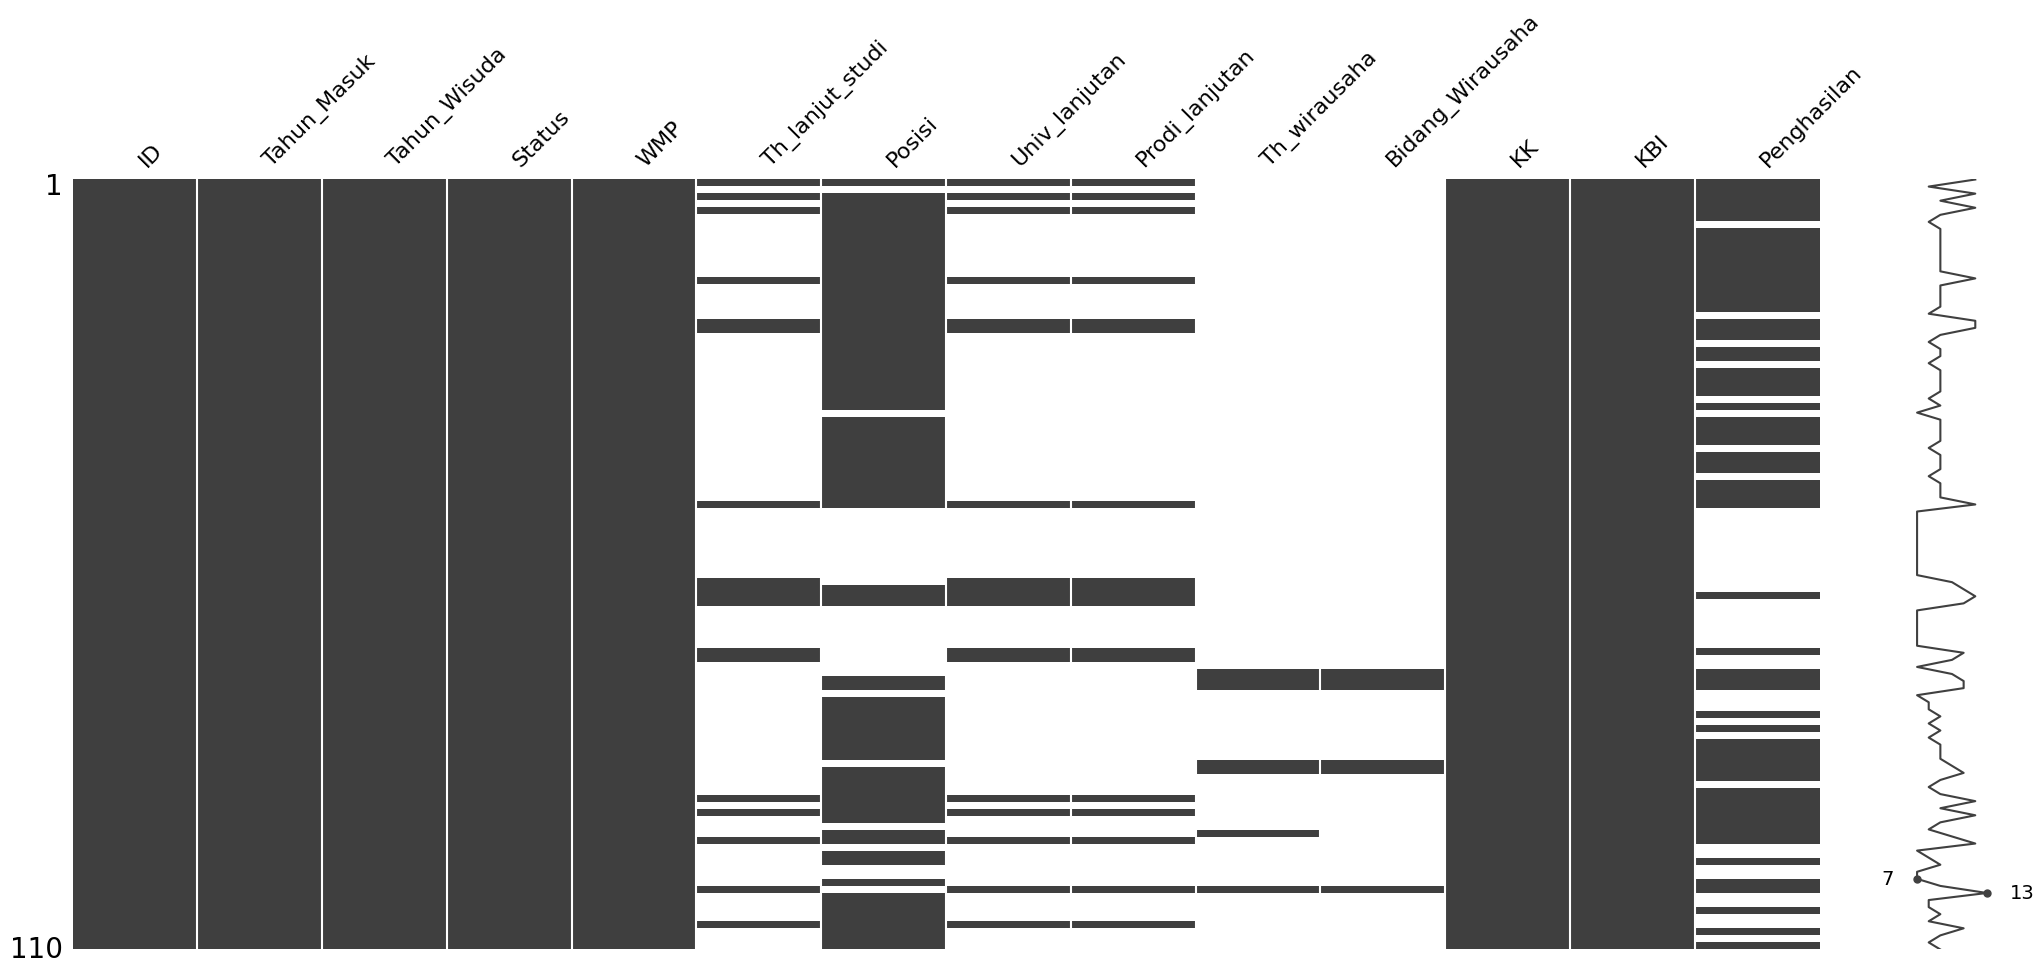

In [ ]:
msnum.matrix(df)

In [ ]:
(df.isnull().sum()/len(df)).to_frame('persentase missing') #cari presentase missing value

,persentase missing
ID,0.000000
Tahun_Masuk,0.000000
Tahun_Wisuda,0.000000
Status,0.000000
WMP,0.000000
Th_lanjut_studi,0.836364
Posisi,0.272727
Univ_lanjutan,0.836364
Prodi_lanjutan,0.836364
Th_wirausaha,0.936364


In [ ]:
# Mengganti missing value karena kosong pada kolom-kolom di bawah mengartikan alumni tidak lanjut studi
df['Th_lanjut_studi'] = df['Th_lanjut_studi'].fillna('Tidak lanjut')
df['Univ_lanjutan'] = df['Univ_lanjutan'].fillna('Tidak lanjut')
df['Prodi_lanjutan'] = df['Prodi_lanjutan'].fillna('Tidak lanjut')

In [ ]:
# Mengganti missing value karena tidak diisi
df['Posisi'] = df['Posisi'].fillna('Tidak diketahui')

In [ ]:
# Karena pada bidang wirausaha missing valuenya lebih dari 90% dan tidak akan digunakan dalam analisis, maka kolom-kolom tersebut akan dihapus
df = df.drop(['Bidang_Wirausaha','Th_wirausaha'], axis = 1)

In [ ]:
imputer = IterativeImputer(max_iter=10, random_state=0)

#imput missing values dalam kolom listrik
df['Penghasilan'] = imputer.fit_transform(df[['Penghasilan']])

In [ ]:
df.isna().sum()

ID                 0
Tahun_Masuk        0
Tahun_Wisuda       0
Status             0
WMP                0
Th_lanjut_studi    0
Posisi             0
Univ_lanjutan      0
Prodi_lanjutan     0
KK                 0
KBI                0
Penghasilan        0
dtype: int64

Missing value semua sudah diisi sesuai ketentuan.

## Tipe Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               110 non-null    int64  
 1   Tahun_Masuk      110 non-null    float64
 2   Tahun_Wisuda     110 non-null    float64
 3   Status           110 non-null    object 
 4   WMP              110 non-null    object 
 5   Th_lanjut_studi  110 non-null    object 
 6   Posisi           110 non-null    object 
 7   Univ_lanjutan    110 non-null    object 
 8   Prodi_lanjutan   110 non-null    object 
 9   KK               110 non-null    float64
 10  KBI              110 non-null    float64
 11  Penghasilan      110 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 10.4+ KB


In [ ]:
# Ubah tipe data
df['Status'] = df['Status'].astype('category')
df['WMP'] = df['WMP'].astype('category')
df['Th_lanjut_studi'] = df['Th_lanjut_studi'].astype('object')
df['Posisi'] = df['Posisi'].astype('category')
df['Univ_lanjutan'] = df['Univ_lanjutan'].astype('category')
df['Prodi_lanjutan'] = df['Prodi_lanjutan'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               110 non-null    int64   
 1   Tahun_Masuk      110 non-null    float64 
 2   Tahun_Wisuda     110 non-null    float64 
 3   Status           110 non-null    category
 4   WMP              110 non-null    category
 5   Th_lanjut_studi  110 non-null    object  
 6   Posisi           110 non-null    category
 7   Univ_lanjutan    110 non-null    category
 8   Prodi_lanjutan   110 non-null    category
 9   KK               110 non-null    float64 
 10  KBI              110 non-null    float64 
 11  Penghasilan      110 non-null    float64 
dtypes: category(5), float64(5), int64(1), object(1)
memory usage: 11.3+ KB


Semua tipe data sudah sesuai dengan ketentuan.

## Duplikasi Data

In [ ]:
df.duplicated().sum()

0

Tidak ada duplikasi data.

## Outlier

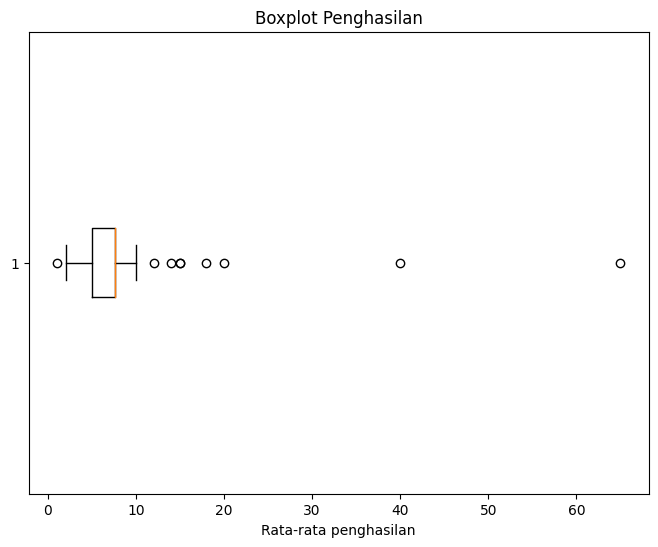

In [ ]:
# boxplot dari kolom penghasilan
plt.figure(figsize=(8, 6))
#plt.boxplot(df['Rata-rata penghasilan (dalam juta)'], vert=False)
plt.boxplot(df['Penghasilan'], vert = False)
plt.xlabel('Rata-rata penghasilan')  #sumbu x
plt.title('Boxplot Penghasilan')  #judul plot
plt.show()

In [ ]:
# Akan dilihat apakah gajinya masih 'make sense'
df.loc[df['Penghasilan']<5]

,ID,Tahun_Masuk,Tahun_Wisuda,Status,WMP,Th_lanjut_studi,Posisi,Univ_lanjutan,Prodi_lanjutan,KK,KBI,Penghasilan
0,1,2004.0,2010.0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,3.0,3.0,4.0
15,16,2017.0,2023.0,Karyawan Swasta,Kurang dari 3 bulan.,Tidak lanjut,Data Management Intern,Tidak lanjut,Tidak lanjut,4.0,4.0,3.0
16,17,2009.0,2013.0,Karyawan Swasta,3-6 Bulan,Tidak lanjut,KEUANGAN DAN GURU MATEMATIKA,Tidak lanjut,Tidak lanjut,4.0,4.0,4.0
22,23,2018.0,2022.0,Karyawan Swasta,Kurang dari 3 bulan.,Tidak lanjut,Junior Application Developer,Tidak lanjut,Tidak lanjut,4.0,3.0,4.9
29,30,2017.0,2022.0,Karyawan Swasta,Kurang dari 3 bulan.,Tidak lanjut,Data Management,Tidak lanjut,Tidak lanjut,4.0,4.0,4.0
36,37,2017.0,2022.0,Karyawan Swasta,Kurang dari 3 bulan.,Tidak lanjut,Tenaga pengajar,Tidak lanjut,Tidak lanjut,3.0,4.0,4.0
40,41,2016.0,2021.0,Karyawan Swasta,3-6 Bulan,Tidak lanjut,Support Marketing Agency,Tidak lanjut,Tidak lanjut,3.0,3.0,2.0
43,44,2005.0,2009.0,Karyawan Swasta,Kurang dari 3 bulan.,Tidak lanjut,Subbagian Sistem dan Pengaduan Masyarakat,Tidak lanjut,Tidak lanjut,3.0,3.0,4.0
46,47,2011.0,2016.0,Karyawan Swasta,Tidak berencana mencari pekerjaan,2017,Dosen,Universitas Brawijaya,Statistika,5.0,5.0,4.0
59,60,2017.0,2022.0,"Karyawan, Melanjutkan Studi",Kurang dari 3 bulan.,2022,Guru,UNJ,Pendidikan Matematika,5.0,4.0,2.0


Outlier akan dibiarkan karena setelah pengecekan pada data, posisi dengan gaji sebesar itu masuk akal.

# Analisis Data

## Karakteristik Alumni

In [ ]:
# Akan dibuat kolom baru untuk lama studi alumni
df['Lama_Studi'] = df["Tahun_Wisuda"]-df["Tahun_Masuk"]
df

,ID,Tahun_Masuk,Tahun_Wisuda,Status,WMP,Th_lanjut_studi,Posisi,Univ_lanjutan,Prodi_lanjutan,KK,KBI,Penghasilan,Lama_Studi
0,1,2004.0,2010.0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,3.0,3.0,4.000000,6.0
1,2,2015.0,2020.0,ASN/PNS,6-12 bulan,Tidak lanjut,Tidak diketahui,Tidak lanjut,Tidak lanjut,3.0,3.0,6.000000,5.0
2,3,2000.0,2006.0,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,5.0,5.0,5.000000,6.0
3,4,2014.0,2019.0,karyawan BUMN,6-12 bulan,Tidak lanjut,Officer HC Solution Analysis Support,Tidak lanjut,Tidak lanjut,3.0,3.0,8.000000,5.0
4,5,2013.0,2018.0,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,4.0,3.0,15.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,2017.0,2023.0,Karyawan Swasta,Kurang dari 3 bulan.,Tidak lanjut,Administrasi HR Database,Tidak lanjut,Tidak lanjut,4.0,4.0,7.646212,6.0
106,107,2011.0,2016.0,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,4.0,4.0,7.646212,5.0
107,108,2016.0,2021.0,Karyawan Swasta,6-12 bulan,Tidak lanjut,Assistant,Tidak lanjut,Tidak lanjut,3.0,3.0,4.500000,5.0
108,109,2003.0,2007.0,Karyawan Swasta,3-6 Bulan,Tidak lanjut,Branch Operation & Service Manager,Tidak lanjut,Tidak lanjut,2.0,2.0,7.646212,4.0


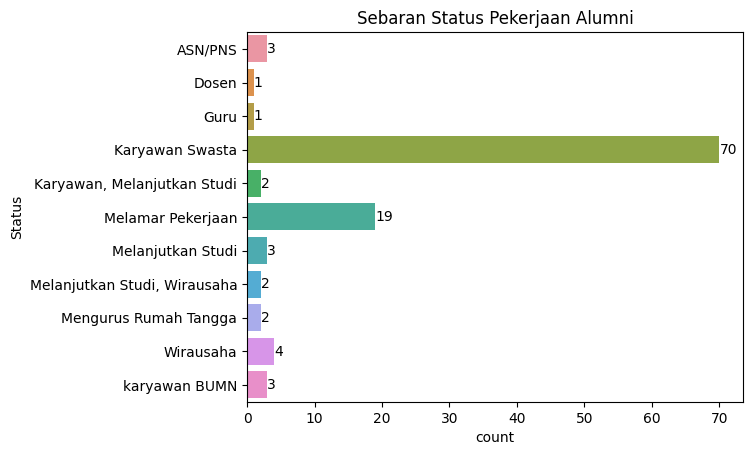

In [ ]:
## Sebaran profesi alumni
job = sns.countplot(y='Status', data=df)
for label in job.containers:
    job.bar_label(label)

plt.title('Sebaran Status Pekerjaan Alumni')
plt.show()

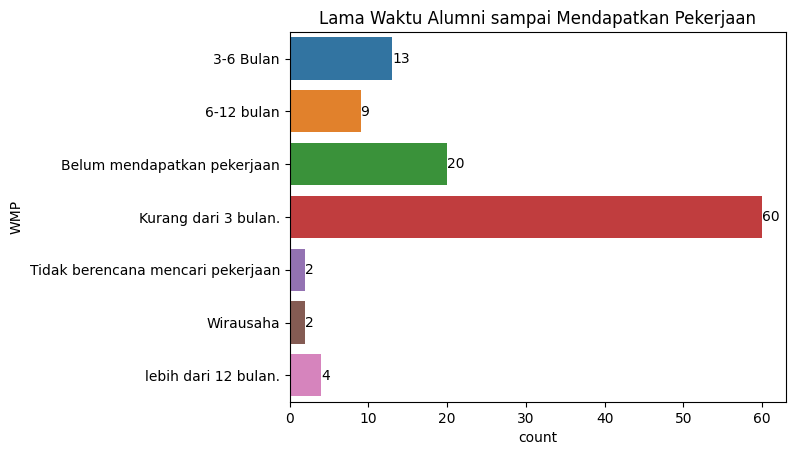

In [ ]:
## Waktu sampai mendapat pekerjaan
time = sns.countplot(y='WMP', data=df)
for label in time.containers:
    time.bar_label(label)

plt.title('Lama Waktu Alumni sampai Mendapatkan Pekerjaan')
plt.show()

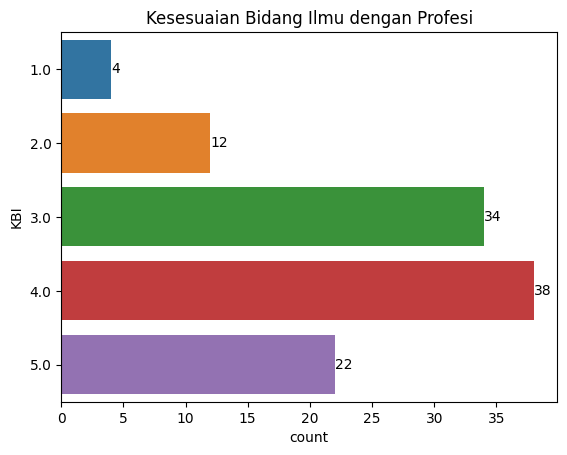

In [ ]:
# Kesesuaian Bidang Ilmu
fix = sns.countplot(y='KBI', data=df)
for label in fix.containers:
    fix.bar_label(label)

plt.title('Kesesuaian Bidang Ilmu dengan Profesi')
plt.show()

##  Alumni yang berpenghasilan tinggi

In [ ]:
mean = df.groupby('Status')['Penghasilan'].mean().reset_index()
mean

,Status,Penghasilan
0,ASN/PNS,5.000000
1,Dosen,3.500000
2,Guru,7.646212
3,Karyawan Swasta,8.111169
4,"Karyawan, Melanjutkan Studi",4.823106
5,Melamar Pekerjaan,7.349043
6,Melanjutkan Studi,5.430808
7,"Melanjutkan Studi, Wirausaha",6.823106
8,Mengurus Rumah Tangga,7.646212
9,Wirausaha,6.750000


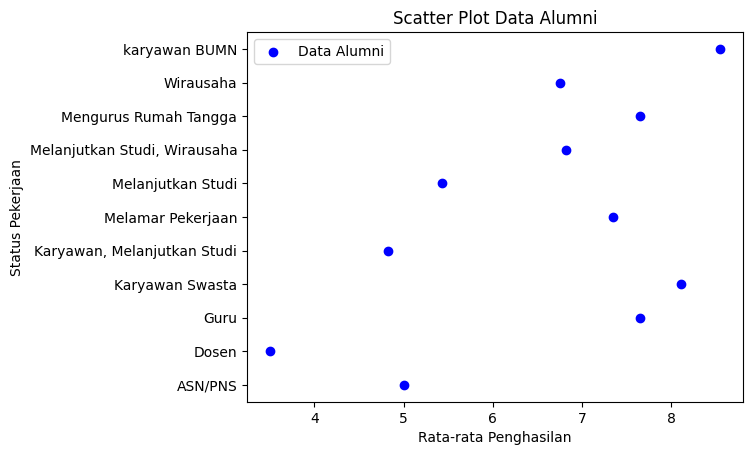

In [ ]:
# Membuat scatter plot
plt.scatter('Penghasilan', 'Status', color='b', label='Data Alumni', data = mean)

# Memberi judul dan label sumbu
plt.title('Scatter Plot Data Alumni')
plt.xlabel('Rata-rata Penghasilan')
plt.ylabel('Status Pekerjaan')

# Menampilkan legend dan plot
plt.legend()
plt.show()

## Apakah lama studi mempengaruhi tingkat penghasilan

In [ ]:
# Fitting model Regresi Sederhana
lm = smf.ols("Penghasilan ~ Lama_Studi + KBI", data=df[['Penghasilan','Lama_Studi','KBI']]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Penghasilan   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9710
Date:                Thu, 26 Oct 2023   Prob (F-statistic):              0.382
Time:                        07:28:36   Log-Likelihood:                -367.85
No. Observations:                 110   AIC:                             741.7
Df Residuals:                     107   BIC:                             749.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6356      4.664      1.852      0.067      -0.610      17.881
Lama_Studi    -0.7061      0.817     -0.864      0.390      -2.326       0.914
KBI            0.6824      0.637      1.071      0.287      -0.581       1.946
==============================================================================
Omnibus:                      173.913   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9903.465
Skew:                           6.140   Prob(JB):                         0.00
Kurtosis:                      47.832   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Lama_Studi', ylabel='Penghasilan'>

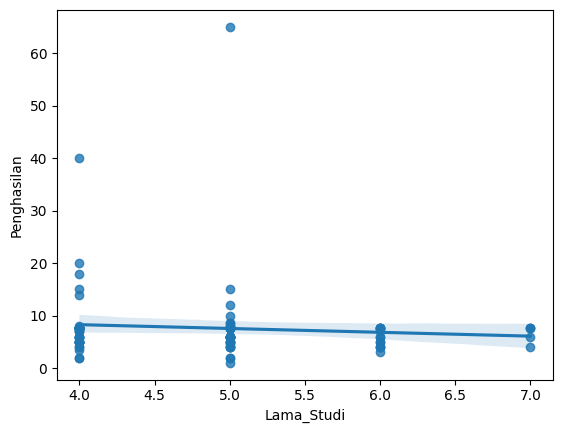

In [ ]:
sns.regplot(x = 'Lama_Studi', y = 'Penghasilan', data = df)